# Data Analysis

## Regression modeling

A general, primary goal of many statistical data analysis tasks is to relate the influence of one variable on another. For example, we may wish to know how different medical interventions influence the incidence or duration of disease, or perhaps a how baseball player's performance varies as a function of age.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.optimize import fmin

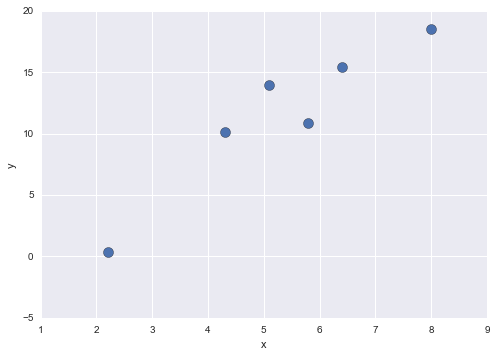

In [2]:
data = pd.DataFrame({'x':np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0]),
                    'y':np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])})
data.plot.scatter('x', 'y', s=100)

We can build a model to characterize the relationship between $X$ and $Y$, recognizing that additional factors other than $X$ (the ones we have measured or are interested in) may influence the response variable $Y$.

<div style="font-size: 150%;">  
$y_i = f(x_i) + \epsilon_i$
</div>

where $f$ is some function, for example a linear function:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
</div>

and $\epsilon_i$ accounts for the difference between the observed response $y_i$ and its prediction from the model $\hat{y_i} = \beta_0 + \beta_1 x_i$. This is sometimes referred to as **process uncertainty**.

We would like to select $\beta_0, \beta_1$ so that the difference between the predictions and the observations is zero, but this is not usually possible. Instead, we choose a reasonable criterion: ***the smallest sum of the squared differences between $\hat{y}$ and $y$***.

<div style="font-size: 120%;">  
$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$  
</div>

Squaring serves two purposes: (1) to prevent positive and negative values from cancelling each other out and (2) to strongly penalize large deviations. Whether the latter is a good thing or not depends on the goals of the analysis.

In other words, we will select the parameters that minimize the squared error of the model.

In [3]:
sum_of_squares = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x) ** 2)

In [4]:
sum_of_squares([0,1], data.x, data.y)

333.35000000000002

In [5]:
b0,b1 = fmin(sum_of_squares, [0,1], args=(data.x, data.y))
b0,b1

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(-4.3500136038870876, 3.0000002915386412)

(0, 20)

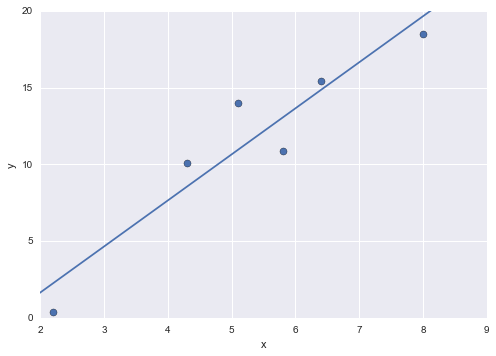

In [6]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])
axes.set_xlim(2, 9)
axes.set_ylim(0, 20)

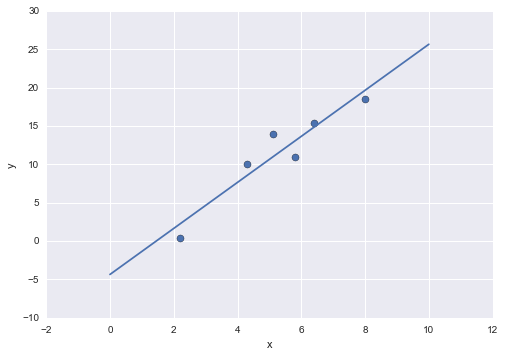

In [7]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])

(0, 20)

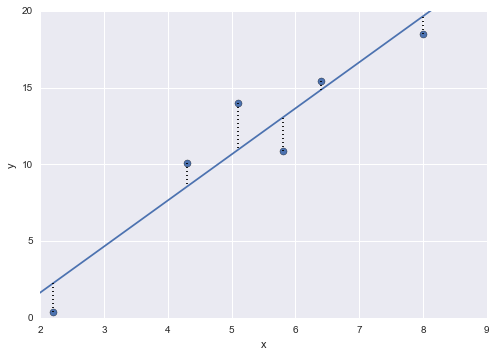

In [8]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])
for i,(xi, yi) in data.iterrows():
    axes.plot([xi]*2, [yi, b0+b1*xi], 'k:')
axes.set_xlim(2, 9)
axes.set_ylim(0, 20)

Minimizing the sum of squares is not the only criterion we can use; it is just a very popular (and successful) one. For example, we can try to minimize the sum of absolute differences:

In [9]:
sum_of_absval = lambda theta, x, y: np.sum(np.abs(y - theta[0] - theta[1]*x))

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77

intercept: 0.0016, slope: 2.3


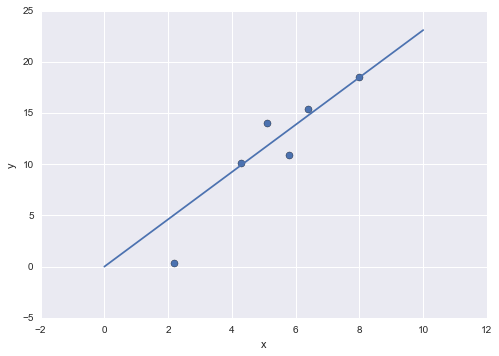

In [10]:
b0,b1 = fmin(sum_of_absval, [0,1], args=(data.x,data.y))
print('\nintercept: {0:.2}, slope: {1:.2}'.format(b0,b1))
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])

We are not restricted to a straight-line regression model; we can represent a curved relationship between our variables by introducing **polynomial** terms. For example, a cubic model:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$
</div>

In [11]:
sum_squares_quad = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2)) ** 2)

Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372

intercept: -1.1e+01, x: 6.1, x2: -0.3


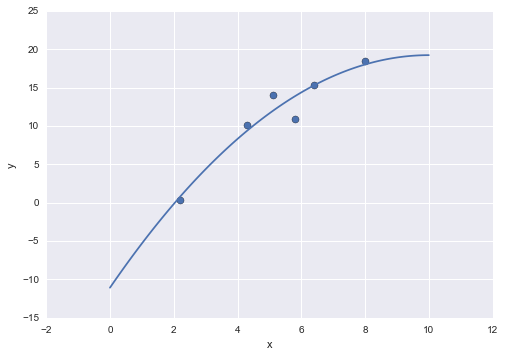

In [12]:
b0,b1,b2 = fmin(sum_squares_quad, [1,1,-1], args=(data.x, data.y))
print('\nintercept: {0:.2}, x: {1:.2}, x2: {2:.2}'.format(b0,b1,b2))
axes = data.plot.scatter('x', 'y', s=50)
xvals = np.linspace(0, 10, 100)
axes.plot(xvals, b0 + b1*xvals + b2*(xvals**2))

Although polynomial model characterizes a nonlinear relationship, it is a linear problem in terms of estimation. That is, the regression model $f(y | x)$ is linear in the parameters.

For some data, it may be reasonable to consider polynomials of order>2. For example, consider the relationship between the number of home runs a baseball player hits and the number of runs batted in (RBI) they accumulate; clearly, the relationship is positive, but we may not expect a linear relationship.

In [13]:
sum_squares_cubic = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2) 
                                  - theta[3]*(x**3)) ** 2)

In [14]:
wine = pd.read_table("../data/wine.dat", sep='\s+')

attributes = ['Grape',
            'Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

wine.columns = attributes

Optimization terminated successfully.
         Current function value: 41.134432
         Iterations: 298
         Function evaluations: 497


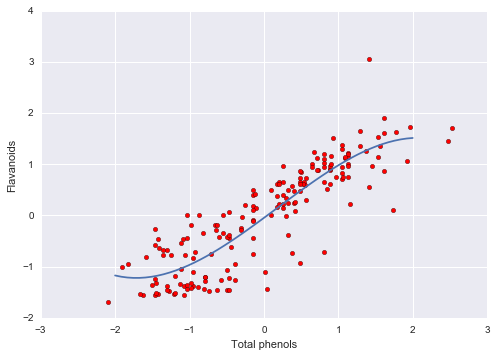

In [15]:
axes = wine.plot.scatter('Total phenols', 'Flavanoids', c='red')
phenols, flavanoids = wine[['Total phenols', 'Flavanoids']].T.values
b0,b1,b2,b3 = fmin(sum_squares_cubic, [0,1,-1,0], args=(phenols, flavanoids))
xvals = np.linspace(-2, 2)
axes.plot(xvals, b0 + b1*xvals + b2*(xvals**2) + b3*(xvals**3))

In practice, we need not fit least squares models by hand because they are implemented generally in packages such as [`scikit-learn`](http://scikit-learn.org/) and [`statsmodels`](https://github.com/statsmodels/statsmodels/). For example, `scikit-learn` package implements least squares models in its `LinearRegression` class:

# Introduction to `Scikit-learn`

The `scikit-learn` package is an open-source library that provides a robust set of machine learning algorithms for Python. It is built upon the core Python scientific stack (*i.e.* NumPy, SciPy, Cython), and has a simple, consistent API, making it useful for a wide range of statistical learning applications.

![scikit learn methods](images/sklearn.png)

## What is Machine Learning?

Machine Learning (ML) is about coding programs that automatically adjust their performance from exposure to information encoded in data. This learning is achieved via **tunable parameters** that are automatically adjusted according to performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

There are three major classes of ML:

**Supervised learning**
: Algorithms which learn from a training set of *labeled* examples (exemplars) to generalize to the set of all possible inputs. Examples of supervised learning include regression and support vector machines.

**Unsupervised learning**
: Algorithms which learn from a training set of *unlableled* examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.

**Reinforcement learning**
: Algorithms that learn via reinforcement from a *critic* that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. We will not cover RL in this workshop.

## Representing Data in `scikit-learn`

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

For a given scikit-learn **estimator** object named `model`, several methods are available. Irrespective of the type of **estimator**, there will be a `fit` method:

- `model.fit` : fit training data. For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`). For unsupervised learning applications, this accepts only a single argument, the data `X` (e.g. `model.fit(X)`).

> During the fitting process, the state of the **estimator** is stored in attributes of the estimator instance named with a trailing underscore character (\_). For example, the sequence of regression trees `sklearn.tree.DecisionTreeRegressor` is stored in `estimators_` attribute.

The **predictor** interface extends the notion of an estimator by adding a `predict` method that takes an array `X_test` and produces predictions based on the learned parameters of the estimator. In the case of supervised learning estimators, this method typically returns the predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as k-means, where the predicted values are the cluster labels.

**supervised estimators** are expected to have the following methods:

- `model.predict` : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`), and returns the learned label for each object in the array.
- `model.predict_proba` : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
- `model.score` : for classification or regression problems, most (all?) estimators implement a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.

Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a **transformer** interface which deﬁnes a `transform` method. It takes as input some new data `X_test` and yields as output a transformed version. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

**unsupervised estimators** will always have these methods:

- `model.transform` : given an unsupervised model, transform new data into the new basis. This also accepts one argument `X_new`, and returns the new representation of the data based on the unsupervised model.
- `model.fit_transform` : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## `scikit-learn` interface

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: 

* **estimator** interface for building and ﬁtting models
* **predictor** interface for making predictions
* **transformer** interface for converting data.

The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (*e.g.*, for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

Scikit-learn strives to have a uniform interface across all methods. For example, a typical **estimator** follows this template:

In [16]:
class Estimator(object):
  
    def fit(self, X, y=None):
        """Fit model to data X (and y)"""
        self.some_attribute = self.some_fitting_method(X, y)
        return self
            
    def predict(self, X_test):
        """Make prediction based on passed features"""
        pred = self.make_prediction(X_test)
        return pred

One commonly-used statistical method in scikit-learn is the Principal Components Analysis, which is implemented in the `PCA` class:

In [17]:
from sklearn.decomposition import PCA

wine_predictors = wine[wine.columns[1:]]
pca = PCA(n_components=2, whiten=True).fit(wine_predictors)
X_pca = pd.DataFrame(pca.transform(wine_predictors), columns=['Component 1' , 'Component 2'])

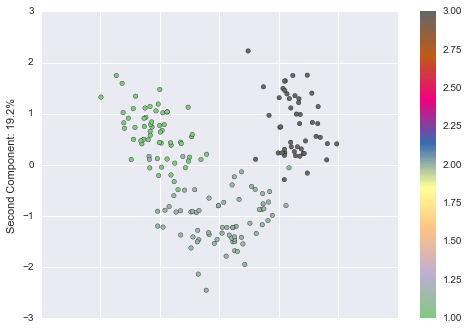

In [18]:
axes = X_pca.plot.scatter(x='Component 1' , y='Component 2', c=wine.Grape, cmap='Accent')
var_explained = pca.explained_variance_ratio_ * 100
axes.set_xlabel('First Component: {0:.1f}%'.format(var_explained[0]))
axes.set_ylabel('Second Component: {0:.1f}%'.format(var_explained[1]))

Similarly, there is a `LinearRegression` class we can use for our regression model:

In [19]:
from sklearn import linear_model

straight_line = linear_model.LinearRegression()
straight_line.fit(data.x.reshape(-1, 1), data.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
straight_line.coef_

array([ 3.])

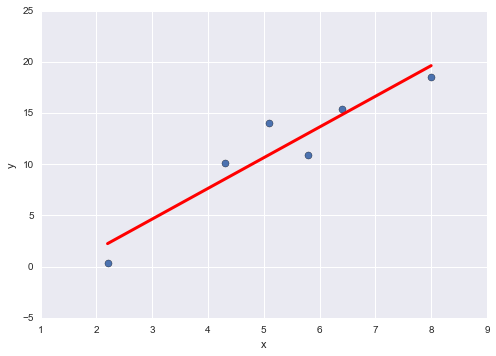

In [21]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot(data.x, straight_line.predict(data.x[:, np.newaxis]), color='red',
         linewidth=3)

For more general regression model building, its helpful to use a tool for describing statistical models, called `patsy`. With `patsy`, it is easy to specify the desired combinations of variables for any particular analysis, using an "R-like" syntax. `patsy` parses the formula string, and uses it to construct the approriate *design matrix* for the model.

For example, the quadratic model specified by hand above can be coded as:

In [24]:
from patsy import dmatrix

X = dmatrix('phenols + I(phenols**2) + I(phenols**3)')
pd.DataFrame(X).head()

,0,1,2,3
0,1.0,0.81,0.6561,0.531441
1,1.0,0.57,0.3249,0.185193
2,1.0,0.81,0.6561,0.531441
3,1.0,2.48,6.1504,15.252992
4,1.0,0.81,0.6561,0.531441


The `dmatrix` function returns the design matrix, which can be passed directly to the `LinearRegression` fitting method.

In [25]:
poly_line = linear_model.LinearRegression(fit_intercept=False)
poly_line.fit(X, flavanoids)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [26]:
poly_line.coef_

array([-0.0477075 ,  1.07353221,  0.05461979, -0.10038996])

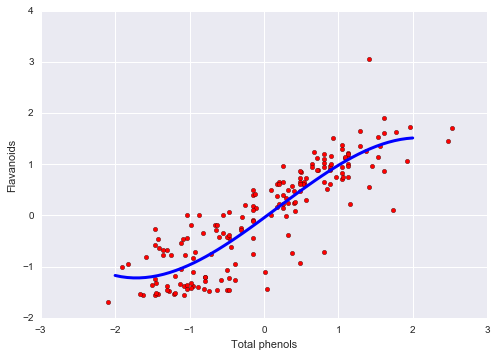

In [27]:
axes = wine.plot.scatter('Total phenols', 'Flavanoids', c='red')
axes.plot(xvals, poly_line.predict(dmatrix('xvals + I(xvals**2) + I(xvals**3)')), color='blue',
         linewidth=3)

## Logistic Regression

Fitting a line to the relationship between two variables using the least squares approach is sensible when the variable we are trying to predict is continuous, but what about when the data are dichotomous?

- male/female
- pass/fail
- died/survived

Let's consider the problem of predicting survival in the Titanic disaster, based on our available information. For example, lets say that we want to predict survival as a function of the fare paid for the journey.

In [28]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.name.head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

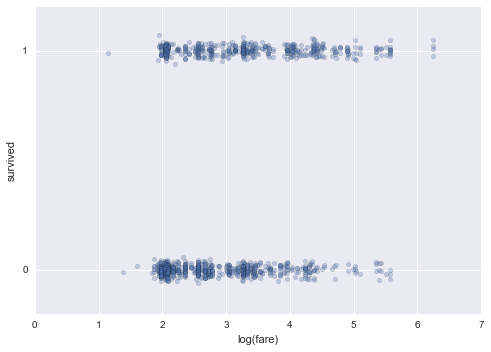

In [29]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
axes = (titanic.assign(logfar=np.log(titanic.fare), surv_jit=titanic.survived + jitter)
         .plot.scatter('logfar', 'surv_jit', alpha=0.3))
axes.set_yticks([0,1])
axes.set_ylabel('survived')
axes.set_xlabel('log(fare)');

I have added random jitter on the y-axis to help visualize the density of the points, and have plotted fare on the log scale.

Clearly, fitting a line through this data makes little sense, for several reasons. First, for most values of the predictor variable, the line would predict values that are not zero or one. Second, it would seem odd to choose least squares (or similar) as a criterion for selecting the best line.

In [30]:
x = np.log(titanic.fare[titanic.fare>0])
y = titanic.survived[titanic.fare>0]
betas_titanic = fmin(sum_of_squares, [1,1], args=(x,y))

Optimization terminated successfully.
         Current function value: 277.621917
         Iterations: 55
         Function evaluations: 103


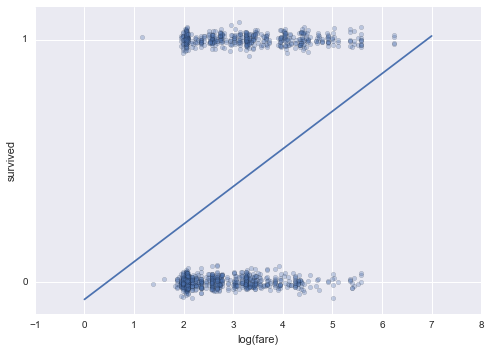

In [31]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
axes = (titanic.assign(logfar=np.log(titanic.fare), surv_jit=titanic.survived + jitter)
         .plot.scatter('logfar', 'surv_jit', alpha=0.3))
axes.set_yticks([0,1])
axes.set_ylabel('survived')
axes.set_xlabel('log(fare)')

axes.plot([0,7], [betas_titanic[0], betas_titanic[0] + betas_titanic[1]*7.])

If we look at this data, we can see that for most values of `fare`, there are some individuals that survived and some that did not. However, notice that the cloud of points is denser on the "survived" (`y=1`) side for larger values of fare than on the "died" (`y=0`) side.

### Stochastic model

Rather than model the binary outcome explicitly, it makes sense instead to model the *probability* of death or survival in a **stochastic** model. Probabilities are measured on a continuous [0,1] scale, which may be more amenable for prediction using a regression line. We need to consider a different probability model for this exerciese however; let's consider the **Bernoulli** distribution as a generative model for our data:

<div style="font-size: 120%;">  
$$f(y|p) = p^{y} (1-p)^{1-y}$$ 
</div>  

where $y = \{0,1\}$ and $p \in [0,1]$. So, this model predicts whether $y$ is zero or one as a function of the probability $p$. Notice that when $y=1$, the $1-p$ term disappears, and when $y=0$, the $p$ term disappears.

So, the model we want to fit should look something like this:

<div style="font-size: 120%;">  
$$p_i = \beta_0 + \beta_1 x_i + \epsilon_i$$
</div>

However, since $p$ is constrained to be between zero and one, it is easy to see where a linear (or polynomial) model might predict values outside of this range. We can modify this model sligtly by using a **link function** to transform the probability to have an unbounded range on a new scale. Specifically, we can use a **logit transformation** as our link function:

<div style="font-size: 120%;">  
$$\text{logit}(p) = \log\left[\frac{p}{1-p}\right] = x$$
</div>

Here's a plot of $p/(1-p)$

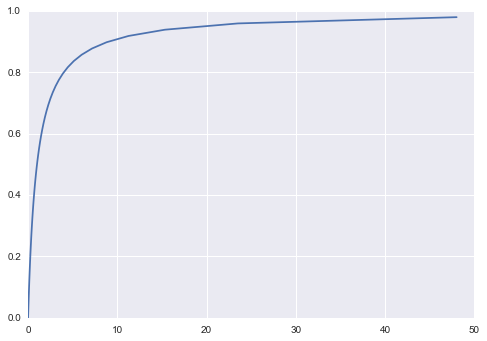

In [32]:
logit = lambda p: np.log(p/(1.-p))
unit_interval = np.linspace(0,1)
plt.plot(unit_interval/(1-unit_interval), unit_interval)

And here's the logit function:

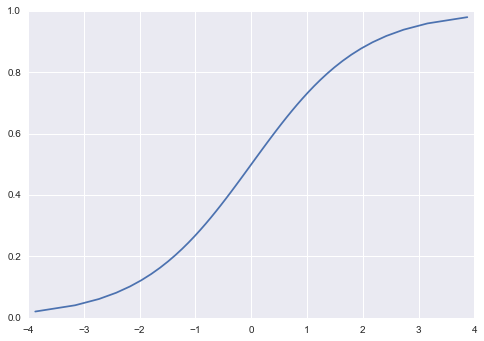

In [33]:
plt.plot(logit(unit_interval), unit_interval)

The inverse of the logit transformation is:

<div style="font-size: 150%;">  
$$p = \frac{1}{1 + \exp(-x)}$$
</div>

In [34]:
invlogit = lambda x: 1. / (1 + np.exp(-x))

So, now our model is:

<div style="font-size: 120%;">  
$$\text{logit}(p_i) = \beta_0 + \beta_1 x_i + \epsilon_i$$
</div>

We can fit this model using maximum likelihood. Our likelihood, again based on the Bernoulli model is:

<div style="font-size: 120%;">  
$$L(y|p) = \prod_{i=1}^n p_i^{y_i} (1-p_i)^{1-y_i}$$
</div>

which, on the log scale is:

<div style="font-size: 120%;">  
$$l(y|p) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
</div>

We can easily implement this in Python, keeping in mind that `fmin` minimizes, rather than maximizes functions:

In [35]:
invlogit = lambda x: 1/(1 + np.exp(-x))

def logistic_like(theta, x, y):
    
    p = invlogit(theta[0] + theta[1] * x)
    
    # Return negative of log-likelihood
    return -np.sum(y * np.log(p) + (1-y) * np.log(1 - p))

Remove null values from variables

In [36]:
x, y = titanic[titanic.fare.notnull()][['fare', 'survived']].values.T

... and fit the model.

In [37]:
b0, b1 = fmin(logistic_like, [0.5,0], args=(x,y))
b0, b1

Optimization terminated successfully.
         Current function value: 827.015955
         Iterations: 47
         Function evaluations: 93


(-0.88238984528338194, 0.012452067664164127)

(0, 600)

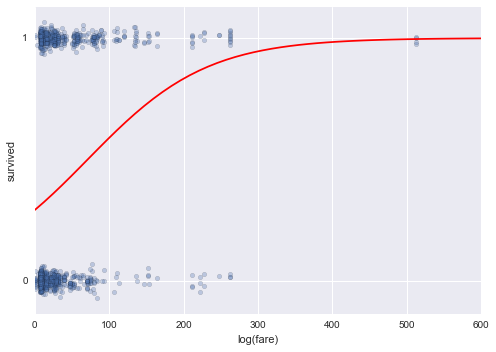

In [38]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
axes = (titanic.assign(surv_jit=titanic.survived + jitter)
         .plot.scatter('fare', 'surv_jit', alpha=0.3))
axes.set_yticks([0,1])
axes.set_ylabel('survived')
axes.set_xlabel('log(fare)')

xvals = np.linspace(0, 600)
axes.plot(xvals, invlogit(b0+b1*xvals),c='red')
axes.set_xlim(0, 600)

As with our least squares model, we can easily fit logistic regression models in `scikit-learn`, in this case using the `LogisticRegression`.

In [39]:
from sklearn.cross_validation import train_test_split
X0 = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X0, y)

The `LogisticRegression` model in scikit-learn employs a regularization coefficient `C`, which defaults to 1. The amount of regularization is lower with larger values of C.

Regularization penalizes the values of regression coefficients, while smaller ones let the coefficients range widely. Scikit-learn includes two penalties: a **l2** penalty which penalizes the sum of the squares of the coefficients (the default), and a **l1** penalty which penalizes the sum of the absolute values.

The reason for doing regularization is to let us to include more covariates than our data might otherwise allow. We only have a few coefficients, so we will set `C` to a large value.

In [40]:
from sklearn.linear_model import LogisticRegression

lrmod = LogisticRegression(C=1000)
lrmod.fit(X_train, y_train)

pred_train = lrmod.predict(X_train)
pred_test = lrmod.predict(X_test)

In [41]:
pd.crosstab(y_train, pred_train, 
            rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,575,27
1.0,311,68


In [42]:
pd.crosstab(y_test, pred_test, 
            rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,199,7
1.0,97,24


In [43]:
lrmod.fit(x[:, np.newaxis], y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
lrmod.coef_

array([[ 0.01245109]])

### Exercise: multivariate logistic regression

Which other variables might be relevant for predicting the probability of surviving the Titanic? Generalize the model likelihood to include 2 or 3 other covariates from the dataset.

In [45]:
# Write your answer here

# Estimating Uncertainty: Bootstrapping

Resampling is the process of repeatedly **drawing subsamples** from a training dataset, and fitting a model to each sample with the goal of discovering additional properties or information about the model. For example, in a regression modeling context, we can fit a particular regression model to each sample, and observe **how the fits vary** among the samples. 

We will introduce **bootstrapping**, an important resampling method that is used in statistical and machine learning applications, particularly for **assessing** models and estimating the **precision** of parameter estimates.

## Bootstrapping

Parametric inference can be **non-robust**:

* inaccurate if parametric assumptions are violated
* if we rely on asymptotic results, we may not achieve an acceptable level of accuracy

Parmetric inference can be **difficult**:

* derivation of sampling distribution may not be possible

An alternative is to estimate the sampling distribution of a statistic *empirically* without making assumptions about the form of the population.

We have seen this already with the kernel density estimate.

### Non-parametric Bootstrap

The bootstrap is a resampling method discovered by [Brad Efron](http://www.jstor.org/discover/10.2307/2958830?uid=3739568&uid=2&uid=4&uid=3739256&sid=21102342537691) that allows one to approximate the true sampling distribution of a dataset, and thereby obtain estimates of the mean and variance of the distribution.

Bootstrap sample:

<div style="font-size: 120%;">  
$$S_1^* = \{x_{11}^*, x_{12}^*, \ldots, x_{1n}^*\}$$
</div>

$S_i^*$ is a sample of size $n$, **with** replacement.

In Python, we have already seen sampling. If we want to use NumPy for this, we can permute the column of names to obtain a sample:

We regard S as an "estimate" of population P

> population : sample :: sample : bootstrap sample

The idea is to generate replicate bootstrap samples:

<div style="font-size: 120%;">  
$$S^* = \{S_1^*, S_2^*, \ldots, S_R^*\}$$
</div>

Compute statistic $t$ (estimate) for each bootstrap sample:

<div style="font-size: 120%;">  
$$T_i^* = t(S^*)$$
</div>

We can bootstrap some confidence intervals for our logistic regression:

In [47]:
import numpy as np

R = 1000
boot_samples = np.empty((R, len(lrmod.coef_[0])))

for i in np.arange(R):
    boot_ind = np.random.randint(0, len(X0), len(X0))
    y_i, X_i = y[boot_ind], X0[boot_ind]
    
    lrmod_i = LogisticRegression(C=1000)
    lrmod_i.fit(X_i, y_i)

    boot_samples[i] = lrmod_i.coef_[0]

### Bootstrap Percentile Intervals

An attractive feature of bootstrap statistics is the ease with which you can obtain an estimate of *uncertainty* for a given statistic. We simply use the empirical quantiles of the bootstrapped statistics to obtain percentiles corresponding to a confidence interval of interest.

This employs the *ordered* bootstrap replicates:

$$T_{(1)}^*, T_{(2)}^*, \ldots, T_{(R)}^*$$

Simply extract the $100(\alpha/2)$ and $100(1-\alpha/2)$ percentiles:

$$T_{[(R+1)\alpha/2]}^* \lt \theta \lt T_{[(R+1)(1-\alpha/2)]}^*$$

In [48]:
boot_samples.sort(axis=0)
boot_samples[:10]

array([[ 0.00612241],
       [ 0.00691847],
       [ 0.0076106 ],
       [ 0.00763578],
       [ 0.00772373],
       [ 0.00785822],
       [ 0.008101  ],
       [ 0.00810345],
       [ 0.00818567],
       [ 0.00825678]])

In [49]:
boot_samples[-10:]

array([[ 0.01857275],
       [ 0.01857521],
       [ 0.01878171],
       [ 0.01916371],
       [ 0.01934111],
       [ 0.01936458],
       [ 0.01988663],
       [ 0.01990481],
       [ 0.02000973],
       [ 0.02168417]])

In [50]:
boot_interval = boot_samples[[25, 975], :].T

In [51]:
boot_interval

array([[ 0.00911729,  0.01734606]])

In [52]:
lrmod.coef_[0]

array([ 0.01245109])

Since we have estimated the expectation of the bootstrapped statistics, we can estimate the **bias** of T:

$$\hat{B}^* = \bar{T}^* - T$$


In [53]:
boot_samples.mean() - lrmod.coef_[0]

array([ 0.00027231])

In [54]:
boot_var = ((boot_samples - boot_samples.mean()) ** 2).sum() / (R-1)
boot_var

4.5548676869787924e-06

### Bootstrap error

There are two sources of error in bootstrap estimates:

1. **Sampling error** from the selection of $S$.
2. **Bootstrap error** from failing to enumerate all possible bootstrap samples.

For the sake of accuracy, it is prudent to choose at least R=1000

### Exercise: Cervical dystonia bootstrap estimates

Use bootstrapping to estimate the mean of one of the treatment groups, and calculate percentile intervals for the mean.

In [55]:
# Write your answer here

## Unsupvervised Learning: Clustering

Clustering is a class of unsupervised learning methods that associates observations according to some specified measure of similarity (e.g. Euclidean distance).

## K-means Algorithm

The K-means clustering algorithm associates each point $x_i$ in a set of input points $\{x_1, x_2, \ldots, x_m\}$ to $K$ clusters. Each cluster is specified by a **centroid** that is the average location of all the points in the cluster. The algorithm proceeds iteratively from arbitrary centroid locations, updating the membership of each point according to minimum distance, then updating the centroid location based on the new cluster membership. 

The algorithm will have converged when the assignment of points to centroids does not change with each iteration.

### Algorithm

1. Initialize cluster centroids:

    $$\mu^{(0)}_1, \ldots, \mu^{(0)}_k \in \mathbb{R}^n$$

2. Iterate until converged:

    a. Set $c_i = \text{argmin}_j || x_i - \mu_j^{(s)} ||$
    
    b. Update centroids:
    
    $$\mu_j^{(s+1)} = \frac{\sum_{i=1}^m I[c_i = j] x_i}{\sum_{i=1}^m I[c_i = j]}$$

The K-means algorithm is simply a Gaussian mixture model with two restrictions: 

1. the covariance matrix is spherical: 

    $$\Sigma_k = \sigma I_D$$

2. the mixture weights are fixed:

    $$\pi_k = \frac{1}{K}$$

Hence, we are only interested in locating the appropriate centroid of the clusters. This serves to speed computation.

We can define the distortion function:

$$J(c,\mu) = \sum_{i]1}^m ||x_i - \mu_{c_i}||$$

which gets smaller at every iteration. So, k-means is coordinate ascent on $J(c,\mu)$

### Choosing $k$

To check whether a chosen $k$ is reasonable, one approach is to compare the distances between the centroids to the mean distance bewween each data point and their assigned centroid. A good fit involves relatively large inter-centroid distances. 

The appropriate value for k (the number of clusters) may depend on the goals of the analysis, or it may be chosen algorithmically, using an optimization procedure.

## Example: wine data

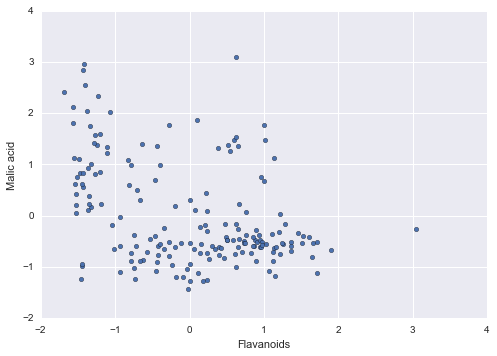

In [57]:
wine.plot.scatter('Flavanoids', 'Malic acid')

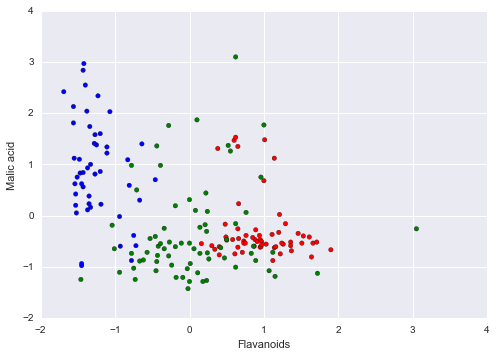

In [58]:
wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[wine.Grape-1])

Let's start with $k=3$, arbitrarily assigned:

In [59]:
centroids = (-1, 2), (-1, -1), (1, 1)

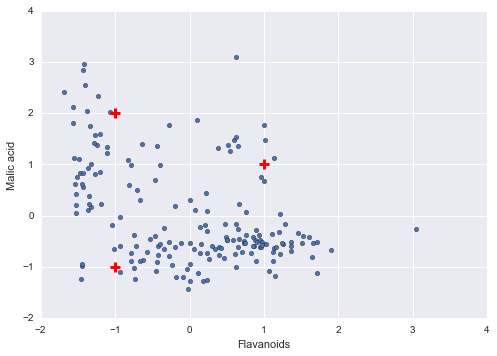

In [60]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid')
axes.scatter(*np.transpose(centroids), c='r', lw=3, marker='+', s=100)

We can use the function `cdist` from SciPy to calculate the distances from each point to each centroid.

In [61]:
from scipy.spatial.distance import cdist

distances = cdist(centroids, wine[['Flavanoids', 'Malic acid']])
distances.shape

(3, 178)

We can make the initial assignment to centroids by picking the minimum distance.

In [62]:
labels = distances.argmin(axis=0)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

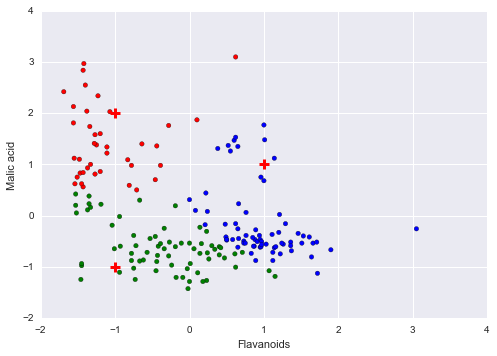

In [63]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[labels])
axes.scatter(*np.transpose(centroids), c='r', marker='+', lw=3, s=100)

Now we can re-assign the centroid locations based on the means of the current members' locations.

In [64]:
centroids

((-1, 2), (-1, -1), (1, 1))

In [65]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [66]:
new_centroids = [wine.loc[labels==i, ['Flavanoids', 'Malic acid']].values.mean(0) for i in range(len(centroids))]

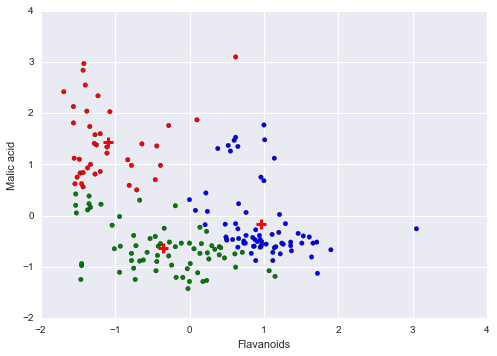

In [67]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[labels])
axes.scatter(*np.transpose(new_centroids), c='r', marker='+', s=100, lw=3)

So, we simply iterate these steps until convergence.

In [68]:
centroids = new_centroids
iterations = 200

for _ in range(iterations):
    distances = cdist(centroids, wine[['Flavanoids', 'Malic acid']])
    labels = distances.argmin(axis=0)
    centroids = [wine.loc[labels==i, ['Flavanoids', 'Malic acid']].values.mean(0) for i in range(len(centroids))]

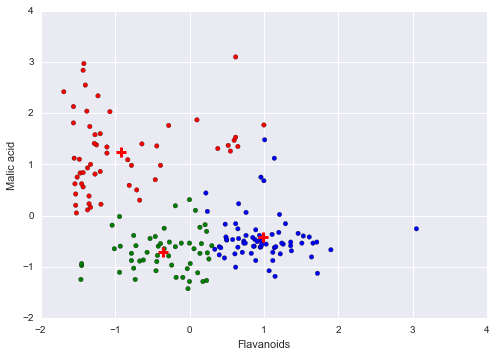

In [69]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[labels])
axes.scatter(*np.transpose(centroids), c='r', marker='+', s=100, lw=3)

## k-means using `scikit-learn`

The `scikit-learn` package includes a `KMeans` class for flexibly fitting K-means models. It includes additional features, such as initialization options and the ability to set the convergence tolerance.

In [70]:
from sklearn.cluster import KMeans
from numpy.random import RandomState
rng = RandomState(1)

# Instantiate model
kmeans = KMeans(n_clusters=3, random_state=rng)
# Fit model
kmeans.fit(wine[['Flavanoids', 'Malic acid']])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto',
    random_state=<mtrand.RandomState object at 0x11d245ca8>, tol=0.0001,
    verbose=0)

After fitting, we can retrieve the labels and cluster centers.

In [71]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0], dtype=int32)

In [72]:
kmeans.cluster_centers_

array([[-0.82653061,  1.39      ],
       [ 0.93527027, -0.46256757],
       [-0.52436364, -0.61527273]])

The resulting plot should look very similar to the one we fit by hand.

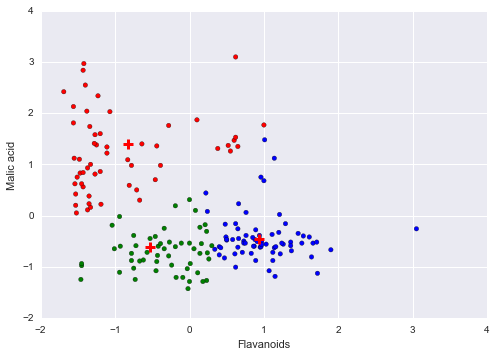

In [73]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[labels])
axes.scatter(*kmeans.cluster_centers_.T, c='r', marker='+', s=100, lw=3)

## Exercise: more wine

Pick two other wine variables, and see how well they cluster relative to the true classes (grapes):

In [74]:
## Write answer here

# Supervised Learning: Decision Trees

One very direct way of performing supervised learning is expressing output as a combination of the predictors (features). An **adaptive basis-function model** (ABM) is one example of this.

$$f(x) = w_0 + \sum_{j=1}^k w_j \phi_j(\mathbf{x})$$

here, $\phi_j$ is a *basis function*, which is typically parametric:

$$\phi_j(\mathbf{x}) = \phi_j(\mathbf{x}|\alpha_j)$$

The parameter set for this model is thus $\theta = \{\mathbf{w} = w_0,\ldots,w_k; \mathbf{\alpha} = \alpha_1, \ldots, \alpha_k\}$. This model is *not* linear in the parameters.


**Decision trees** use an ABM to *recursively partition* the space of predictor variables into a piecewise-constant response surface. We can consider each component $j=1,\ldots,k$ to be a region in the response surface, and $w_j$ the expected response in that region.

$$f(x) = \sum_{j=1}^k w_j I(\mathbf{x} \in R_j)$$

Each paramter $\alpha_j$ encodes both (1) a variable used for splitting and (2) the corresponding threshold value. Specifically, the basis functions define the regions, and the weights encode the response value in each region.

This particular formulation implies a regression-type model, but we can generalize this to classification by storing the *distribution over classes* in each leaf, instead of the mean response.

To get a sense of how decision trees work, consider a diabetes dataset from which we wish to predict disease progression from a range of predictors. In the plot below, the response variable (`target`, an index of disease progression) is color-coded as a function of two variables, metabolic rate (`bmi`) and a blood serum measurement (`ltg`).

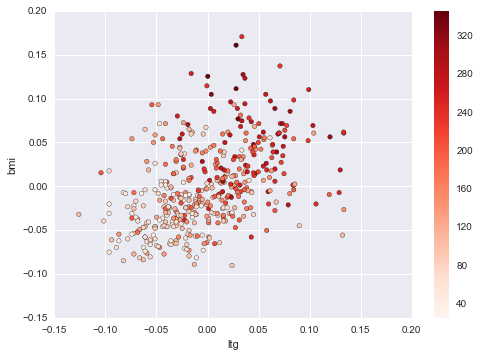

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.datasets import load_diabetes

# Predictors: "age" "sex" "bmi" "map" "tc"  "ldl" "hdl" "tch" "ltg" "glu"
diabetes = load_diabetes()
y = diabetes['target']
bmi, ltg = diabetes['data'][:,[2,8]].T

plt.scatter(ltg, bmi,  c=y, cmap="Reds")
plt.colorbar()
plt.xlabel('ltg'); plt.ylabel('bmi');

One approach to building a predictive model is to subdivide the variable space into regions, by sequentially subdividing each variable. For example, if we split `ltg` at a threshold value of -0.01, it does a reasonable job of isolating the large values in one of the resulting subspaces.

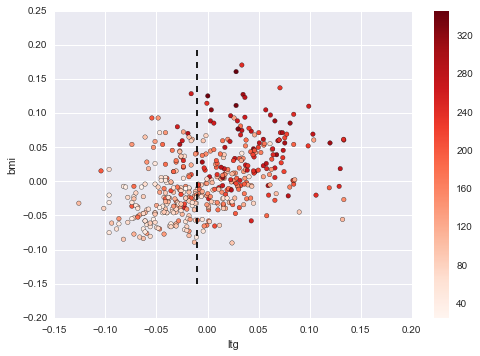

In [76]:
ltg_split = -0.01
plt.scatter(ltg, bmi,  c=y, cmap="Reds")
plt.vlines(ltg_split, *plt.gca().get_ylim(), linestyles='dashed')
plt.colorbar()
plt.xlabel('ltg'); plt.ylabel('bmi');

However, that region still contains a fair number of low (light) values, so we can similarly bisect the region using a `bmi` value of -0.03 as a threshold value:

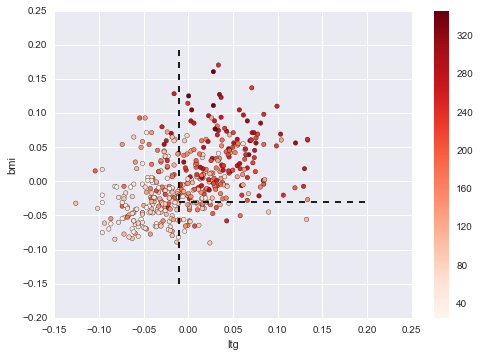

In [77]:
bmi_split = -0.03
plt.scatter(ltg, bmi,  c=y, cmap="Reds")
plt.vlines(ltg_split, *plt.gca().get_ylim(), linestyles='dashed')
plt.hlines(bmi_split, ltg_split, plt.gca().get_xlim()[1], linestyles='dashed')
plt.colorbar()
plt.xlabel('ltg'); plt.ylabel('bmi');

We can use this partition to create a piecewise-constant function, which returns the average value of the observations in each region defined by the threshold values. We could then use this rudimentary function as a predictive model.

In [78]:
np.mean(y[(bmi>bmi_split) & (ltg>ltg_split)])

197.69417475728156

In [79]:
np.mean(y[(bmi<=bmi_split) & (ltg>ltg_split)])

136.93939393939394

In [80]:
np.mean(y[ltg<ltg_split])

108.36945812807882

The choices for splitting the variables here were relatively arbitrary. Better choices can be made using a cost function $C$, such as residual sums of squares (RSS).

$$C = \sum_j \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2$$

where $\hat{y}_{R_j}$ is the mean response for the training observations in the jth region.

### Exercise

Use residual sums of squares to select competitive threshold values for the predictive model defined above

In [81]:
# Write your answer here

The recursive partitioning demonstrated above results in a **decision tree**. The regions defined by the trees are called *terminal nodes*. Locations at which a predictor is split, such as `bmi`=-0.03, are called  *internal nodes*. As with this simple example, splits are not generally symmetric, in the sense that splits do not occur similarly on all branches.

Now consider a subset of three variables from the Titanic dataset, which we would like to use to predict survival from the disaster. The following describes one such decision tree:

We first check if gender of the passenger is male. If "no", we follow the right branch and end up in a leaf where the probability of survival is $p(y=1,x_1=F)=0.73$, so we predict survival ($y=1$) at this node (36% of observations fall under this leaf). If the passenger is male, we then check the age of the passenger. If he is older than 9.5 years, then the probability of survival $p(y=1,x_1=M,x_2>9.5)=0.17$, so we predict death ($y=0$). If, on the other hand, the passenger is younger than 9.5 years, we then check if the number of siblings and spouses on board was higher than 2.5; if "yes", then the probability of survival  $p(y=1, x_1=M, x_2>9.5, x_3>2.5)=0.05$, so we predict death, otherwise we predict survival with $p(y=1, x_1=M, x_2>9.5 , x_3 \lt 2.5)=0.89$. Hence, these probabilities are just the empirical fraction of positive examples that satisfy each conjunction of feature values, which defines a path from the root to a leaf.

![titanic tree](images/CART_tree_titanic_survivors.png)

There is no way to feasibly evaluate all possible partitions. Instead, the strategy is to use a top-down, **greedy** approach that is optimal (according to a particular cost function) for the current split only. By "greedy", we mean that at each step it chooses the most advantageous binary partition, not taking into account the impact of the choice on the quality of subsequent partitions.

$$(j^*, t^*) = \text{argmin}_{j,t} C(\{\mathbf{x}_i,y_i: x_{ij} \le t\}) + C(\{\mathbf{x}_i,y_i: x_{ij} \gt t\})$$

where $C$ is a cost function, $j$ and $t$ are a variable index and cutpoint, respectively. We will restrict consideration to binary partitions.

## Classification Trees

In addition to regression trees, we can also use decision trees on categorical outcomes, and these are called classification trees. The primary difference in implementation is that residual sums of squares is no longer an appropriate splitting criterion.

### Entropy

An alternative splitting criterion for decision tree learning algorithms is *information gain*. It measures how well a particular attribute distinguishes among different target classifications. Information gain is measured in terms of the expected reduction in the entropy or impurity of the data. The entropy of a set of probabilities is:

$$H(p) = -\sum_i p_i log_2(p_i)$$

If we have a set of binary responses from some variable, all of which are positive/true/1, then knowing the values of the variable does not hold any predictive value for us, since all the outcomes are positive. Hence, the entropy is zero:

In [82]:
import numpy as np

entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0

In [83]:
entropy([.4,.6])

0.97095059445466858

However, if the variable splits responses into equal numbers of positive and negative values, then entropy is maximized, and we wish to know about the feature:

In [84]:
entropy([0.5, 0.5])

1.0

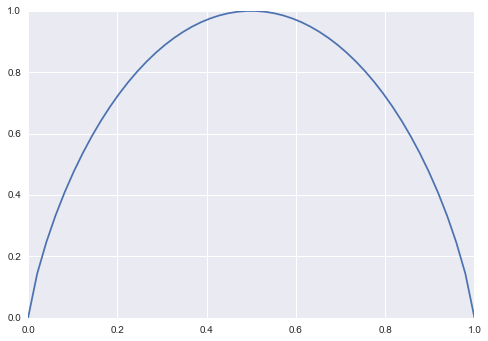

In [85]:
pvals = np.linspace(0, 1)        
plt.plot(pvals, [entropy([p,1-p]) for p in pvals])

The entropy calculation tells us how much additional information we would obtain with knowledge of the variable.

So, if we have a set of candidate covariates from which to choose as a node in a decision tree, we should choose the one that gives us the most information about the response variable (*i.e.* the one with the highest entropy).

### Misclassification Rate

Alternatively, we can use the misclassification rate:

$$C(j,t) = \frac{1}{n_{jt}} \sum_{y_i: x_{ij} \gt t} I(y_i \ne \hat{y})$$

where $\hat{y}$ is the most probable class label and $n_{ij}$ is the number of observations in the data subset obtained from splitting via $j,t$.

### Gini index

The Gini index is simply the expected error rate:

$$C(j,t) = \sum_{k=1}^K \hat{\pi}_{jt}[k] (1 - \hat{\pi}_{jt}[k]) = 1 - \sum_{k=1}^K \hat{\pi}_{jt}[k]^2$$

where $\hat{\pi}_{jt}[k]$ is the probability of an observation being correctly classified as class $k$ for the data subset obtained from splitting via $j,t$ (hence, $(1 - \hat{\pi}_{jt}[k])$ is the misclassification probability).

In [86]:
gini = lambda p: 1. - (np.array(p)**2).sum()

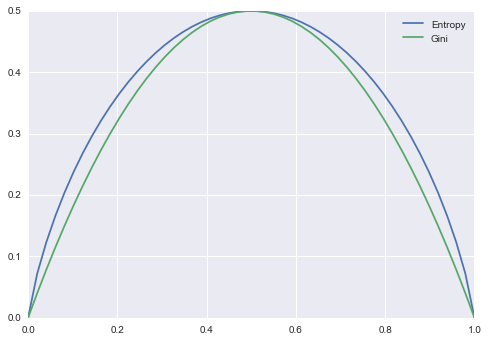

In [87]:
pvals = np.linspace(0, 1)        
plt.plot(pvals, [entropy([p,1-p])/2. for p in pvals], label='Entropy')
plt.plot(pvals, [gini([p,1-p]) for p in pvals], label='Gini')
plt.legend()

## ID3

A given cost function can be used to construct a decision tree via one of several algorithms. The Iterative Dichotomiser 3 (ID3) is on such algorithm, which uses entropy, and a related concept, *information gain*, to choose features and partitions at each classification step in the tree.

Information gain is the difference between the current entropy of a system and the entropy measured after a feature is chosen. If $S$ is a set of examples and $X$ is a possible feature on which to partition the examples, then:

$$G(S,X) = \text{Entropy}(S) - \sum_{x \in X} \frac{\#(S_x)}{\#(S)} \text{Entropy}(S_x)$$

where $\#$ is the count function and $x$ is a particular value of $X$.

Let's say $S$ is a set of survival events, $S = \{s_1=survived, s_2=died, s_3=died, s_4=died\}$ and a particular variable $X$ can have values $\{x_1, x_2, x_3\}$. To perform a sample calculation of information gain, we will say that:

* $X(s_1) = x_2$
* $X(s_2) = x_2$
* $X(s_3) = x_3$
* $X(s_4) = x_1$

The current entropy of this state is:

$$\begin{align}
\text{Entropy}(S) &= -p^{(+)} \log_2(p^{(+)}) - p^{(-)} \log_2(p^{(-)}) \\
&= -0.25 \log_2(0.25) - 0.75 \log_2(0.75) \\
&= 0.5 + 0.311 = 0.811
\end{align}$$

Now, we need to compute the information after selecting variable $X$, which is the sum of three terms:

$$\begin{align}
\frac{\#(S_{x1})}{\#(S)} \text{Entropy}(S) &= 0.25 (-0 \log_2(0) - 1 \log_2(1)) = 0\\
\frac{\#(S_{x2})}{\#(S)} \text{Entropy}(S) &= 0.5 (-0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 0.5\\
\frac{\#(S_{x3})}{\#(S)} \text{Entropy}(S) &= 0.25 (-0 \log_2(0) - 1 \log_2 1) = 0\\
\end{align}$$

Therefore, the information gain is:

$$G(S,X) = 0.811 - (0 + 0.5 + 0) = 0.311$$

In [88]:
import numpy as np

def info_gain(X, y, feature):
    # Calculates the information gain based on entropy
    
    gain = 0
    n = len(X)

    # List the values that feature can take
    values = list(set(X[feature]))

    feature_counts = np.zeros(len(values))
    E = np.zeros(len(values))
    ivalue = 0
    
    # Find where those values appear in X[feature] and the corresponding class
    for value in values:
        
        new_y = [y[i] for i,d in enumerate(X[feature].values) if d==value]
        feature_counts[ivalue] += len(new_y)

        # Get the values in newClasses
        class_values = list(set(new_y))

        class_counts = np.zeros(len(class_values))
        iclass = 0
        for v in class_values:
            for c in new_y:
                if c == v:
                    class_counts[iclass] += 1 
            iclass += 1
        
        nc = float(np.sum(class_counts))
        new_entropy = entropy([class_counts[c] / nc for c in range(len(class_values))])
        E[ivalue] += new_entropy

        # Computes both the Gini gain and the entropy
        gain += float(feature_counts[ivalue])/n * E[ivalue]
        ivalue += 1
        
    return gain 

Consider a few variables from the titanic database:

In [89]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


Here, we have selected pasenger class (`pclass`), sex, port of embarcation (`embarked`), and a derived variable called `adult`. We can calculate the information gain for each of these.

In [90]:
y = titanic['survived']
X = titanic[['pclass','sex','embarked']]
X['adult'] = titanic.age<17

info_gain(X, y, 'pclass')

/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0.8890147580167741

In [91]:
info_gain(X, y, 'sex')

0.75391729814273911

In [92]:
info_gain(X, y, 'embarked')

0.93350672011351277

In [93]:
info_gain(X, y, 'adult')

0.94962718318029182

Hence, the ID3 algorithm computes the information gain for each variable, selecting the one with the highest value (in this case, `adult`). In this way, it searches the "tree space" according to a greedy strategy.

A tree can be constructed by recursively selecting the feature from the current dataset with the largest information gain, then removing it from the datset. Recursion stops when there are either no variables remaining, or there is only one class left in the subset (*e.g.* all `True` or all `False`).

The ID3 algorithm is as follows:

> * if all response data have the same class:
> 
>     - return leaf with data label
>     
> * else if no features:
> 
>     - return leaf with most common label
>     
> * else:
> 
>     - choose variable $X'$ that maximizes information gain to be a tree node
>     - add branch from node for each value of $X'$
>     - for each branch of node:
>     
>         * calculate $S_{x}$ by removing $X'$ from $S$
>         * set $S=S_{x}$ and call algorithm again 

The greedy approach of maximizing information gain at each step tends to bias solutions towards smaller trees.

## Decision Trees in `scikit-learn`

Classification trees, either binary or multi-class, are implemented in `scikit-learn` in the `DecisionTreeClassifier` class. Where trees are binary, it expects the response variable to be coded as `[-1,1]` for negative and positive outcomes.

Let's build a decision tree on a wine dataset.

In [94]:
wine = pd.read_table("../data/wine.dat", sep='\s+')

attributes = ['Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

grape = wine.pop('region')
y = grape
wine.columns = attributes
X = wine

In [95]:
from sklearn import tree
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        X, y, test_size=0.4, random_state=0)

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_features="auto",
                                  min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

If you have [GraphViz](http://www.graphviz.org) installed, you can draw the resulting tree:

In [96]:
with open("wine.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [97]:
! dot -Tpng wine.dot -o wine.png

In [98]:
for i,x in enumerate(X.columns):
    print(i,x)

0 Alcohol
1 Malic acid
2 Ash
3 Alcalinity of ash
4 Magnesium
5 Total phenols
6 Flavanoids
7 Nonflavanoid phenols
8 Proanthocyanins
9 Color intensity
10 Hue
11 OD280/OD315 of diluted wines
12 Proline


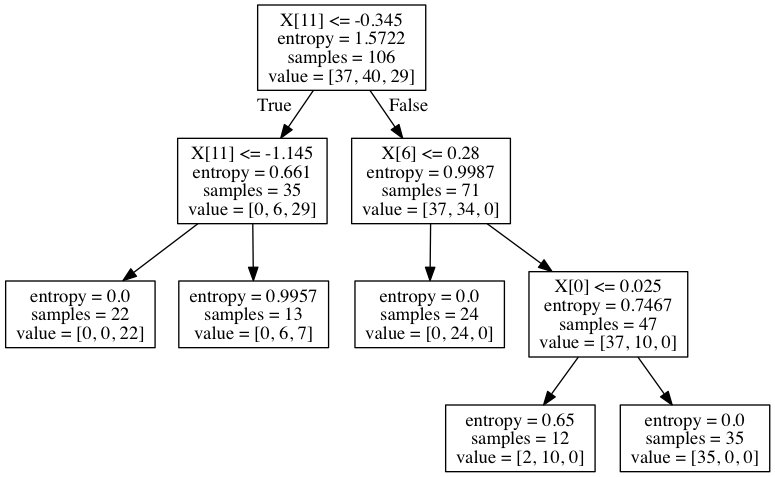

In [99]:
from IPython.core.display import Image
Image("wine.png")

In [100]:
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

prediction,1,2,3
actual,,,
1,21,1,0
2,3,18,10
3,0,1,18


### Pruning

Despite the *inductive bias* associated with trees that tend to make them small, the ID3 algorithm continues choosing nodes and branches until either it runs out of variables, or all outputs are of the same class. This can clearly lead to overfit trees.

To prevent overfitting, we can stop growing the tree if the information gain (or reduction in error, etc.) is not sufficient to justify the extra complexity of adding another node. However, this simple rule is not optimal, because an uninformative subtree can lead to informative ones later on. 

The standard approach is therefore to grow a full tree, and then to *prune* it. The easiest approach is to remove branches that give the least increase in the error (information gain). To determine how far back to prune, we can evaluate the cross-validated error on each candidate pruning, and then pick the tree whose CV error is within 1 standard error of the minimum.

Analogous to the lasso or ridge regression, we can penalize the number of terminal nodes in a tree:

$$\sum_{m=1}^{|T|} \sum_{x_i \in R_m} (y_i - \hat{y}_{R_j})^2 + \alpha |T|$$

where $|T|$ is the number of terminal nodes in tree T.

### Pruned Decision Tree Algorithm

1. Use recursive binary splitting to grow a large tree, such that each terminal node has fewer than some minimum number of observations.
2. Apply pruning to obtain a sequence of best subtrees, as a function of $\alpha$.
3. Use k-fold cross-validation to choose $\alpha$. Average results and pick $\alpha$ to minimize the average error.
4. Return subtree from (2) that corresponds to chosen $\alpha$.


## Random Forests

Decision trees have several advantages: 

* ease of interpretation
* handles continuous and discrete features
* invariant to monotone transformation of features
* variable selection automated
* robust
* scalable

However, relative to other statistical learning methods, trees do not predict very accurately, due to the greedy nature of the tree construction algorithm. Also, trees tend to be **unstable**, as small changes to the inputs can have large effects on the structure of the tree; poor decisions near the root of the tree will propogate to the rest of the tree. Hence, trees are **high variance** (*i.e.* noisy) estimators.

One way to reduce the variance of an estimate is to average together many estimates. In the case of decision trees, we can train $T$ different trees on random subsets of the data (with replacement) then average according to:

$$\hat{f}(\mathbf{x}) = \frac{1}{T} \sum_{i=1}^T f_t(\mathbf{x})$$

where $f_t$ is the $t^{th}$ tree. This approach is called "bootstrap aggregating", or **bagging**.

Note that, since we are averaging over trees, there is *no need to prune*. With bagging, we reduce variance by averaging, rather than by pruning.

In [101]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(n_jobs=4, oob_score=True)
bc

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=4, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [102]:
bc.fit(X_train, y_train)

preds = bc.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.4/site-packages/sklearn/ensemble/bagging.py:537: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


prediction,1,2,3
actual,,,
1,21,1,0
2,1,28,2
3,0,0,19


Test error of a bagged model is measured by estimating **out-of-bag error**.

On average, each bagged tree uses about 2/3 of observations, leaving the remaining third as "out-of bag". The response for the ith observation for each of the trees in which that observation was excluded (on average, B/3) is averaged. This essentially the same as performing leave-one-out (LOO) cross-validation.

In [103]:
bc.oob_score_

0.075471698113207544

This approach is an **ensemble learning** method, because it takes a set of *weak* learners, and combines them to construct a *strong* learner that is more robust, with lower generalization error.

An average of B trees, each with variance $\sigma^2$, has variance $\sigma^2/B$. If the variables are simply identically distributed, with positive pairwise correlation $\rho$, then the variance of the average of the B trees is:

$$\rho \sigma^2 + \frac{1-\rho}{B}\sigma^2$$

As the number of trees becomes large, the second term goes to zero. Further reductions in variance are limited by the size of the correlation among the trees $\rho$.

**Random forests** improves upon bagging by creating a set of decision trees that are less correlated than bootstrapped trees. This is done by selecting from only a subset $m$ out of $M$ possible predictors at each split. Typically, we choose approximately the square root of the available number.

This procedure is used to create a set of trees, most of which will be poor at predicting a given observation. However, classification is based on a *majority vote* of the constituent trees.

In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

prediction,1,2,3
actual,,,
1,22,0,0
2,0,29,2
3,0,0,19


With random forests, it is possible to quantify the relative importance of feature inputs for classification. In scikit-learn, the Gini index (recall, a measure of error reduction) is calculated for each internal node that splits on a particular feature of a given tree, which is multiplied by the number of samples that were routed to the node (this approximates the probability of reaching that node). For each variable, this quantity is averaged over the trees in the forest to yield a measure of importance.

In [105]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Flavanoids (0.220691)
2. OD280/OD315 of diluted wines (0.204707)
3. Color intensity (0.155042)
4. Alcohol (0.138199)
5. Proline (0.089696)
6. Total phenols (0.047831)
7. Alcalinity of ash (0.047498)
8. Ash (0.023371)
9. Nonflavanoid phenols (0.022023)
10. Magnesium (0.019727)
11. Malic acid (0.013024)
12. Hue (0.009726)
13. Proanthocyanins (0.008464)


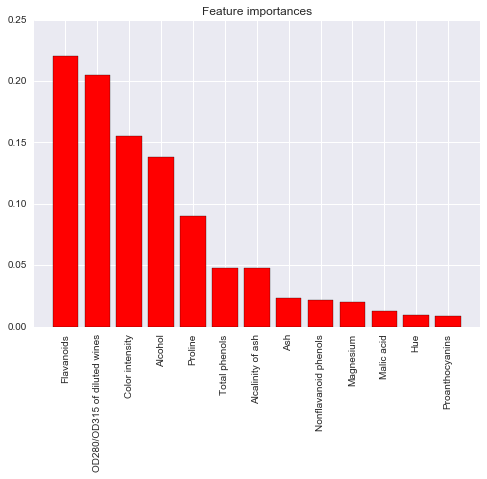

In [106]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]]);

`RandomForestClassifier` uses the Gini impurity index by default; one may instead use the entropy information gain as a criterion.

In [107]:
rf = RandomForestClassifier(n_jobs=4, criterion='entropy')
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Flavanoids (0.215146)
2. Color intensity (0.181532)
3. Hue (0.144080)
4. Alcalinity of ash (0.096059)
5. Proline (0.093427)
6. Alcohol (0.079848)
7. OD280/OD315 of diluted wines (0.067851)
8. Malic acid (0.042237)
9. Total phenols (0.030304)
10. Proanthocyanins (0.019366)
11. Magnesium (0.014474)
12. Nonflavanoid phenols (0.012649)
13. Ash (0.003028)


## References

Meinshausen, N. [Quantile Regression Forests](http://www.jmlr.org/papers/volume7/meinshausen06a/meinshausen06a.pdf) Journal of Machine Learning Research 7 (2006) 983–999

T. Hastie, R. Tibshirani and J. Friedman. (2009) [Elements of Statistical Learning: Data Mining, Inference, and Prediction](http://statweb.stanford.edu/~tibs/ElemStatLearn/), second edition. Springer.
